# Introduction
## Importing Libraries

In [1]:
print('[-] Importing packages...')
# File Connection and File Manipulation
import os
import pickle
import gzip
import json
# Basic Data Science Toolkits
import pandas as pd
import numpy as np
import math
import random
import time
import re
import itertools
import datetime
# Basic Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
# Text Preprocessing(other)
import string
import nltk

[-] Importing packages...


In [2]:
print('[-] Importing packages...')
try:
  import pyvis
  from pyvis.network import Network
except:
  !pip install pyvis
  import pyvis
  from pyvis.network import Network

[-] Importing packages...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.5 MB/s eta 0:00:00


In [3]:
#Download required corpus based data to nltk package
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Set Global Variables

In [4]:
gDEBUG = True

## Verify GPU runtime

In [5]:
#see the GPU assigned
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


## Set Up Directories

In [8]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


 drive	'Network Analysis'   sample_data


In [14]:
ROOT_DIR = "/content/drive/MyDrive/Network Analysis"
DATA_DIR = "%s/data" % ROOT_DIR
EVAL_DIR = "%s/evaluation" % ROOT_DIR
MODEL_DIR = "%s/models" % ROOT_DIR

#Create missing directories, if they don't exist
if not os.path.exists(DATA_DIR):
    # Create a new directory because it does not exist
    os.makedirs(DATA_DIR)
    print("The data directory is created!")
if not os.path.exists(EVAL_DIR):
    # Create a new directory because it does not exist
    os.makedirs(EVAL_DIR)
    print("The evaluation directory is created!")
if not os.path.exists(MODEL_DIR):
    # Create a new directory because it does not exist
    os.makedirs(MODEL_DIR)
    print("The model directory is created!")

The data directory is created!
The evaluation directory is created!
The model directory is created!


# Loading the Data
## Downloading the Data

In [ ]:
#link would be expired by the time of the grading. It's just here to show how it could be done.
#import urllib.request
#url = 'https://d3c33hcgiwev3.cloudfront.net/Rylguh2DR_CpYLodg0fwQQ_1199ff1bd63f4163bc4de1e7806c70f1_nikelululemonadidas_tweets.jsonl.gz?Expires=1712102400&Signature=i9uv4cAI6bDpP2tP3nODY~qmBSPEt~ywYmy6H0i9CIjG2siek56an3vNbEzUC8BESaVtb-sjqQAALUtjHeyTEANAs8dnUXs~vISoeH7FydUKZYO5rJAjO2Xj~NxYRBt1e78rUILA4ZPP2LWWbrvxpOBW-yNBWu19KAH8nk74DrM_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'
#filename = './data/nikelululemonadidas_tweets.jsonl.gz'
#urllib.request.urlretrieve(url, filename)

## Basic Inspection and Sanity Check

In [15]:
LIMIT = 5
tweet_file_path = '%s/nikelululemonadidas_tweets.jsonl.gz' % DATA_DIR
with gzip.open(tweet_file_path) as f:
    for i, line in enumerate(f):
        if i >= LIMIT:
            break
        tweet = json.loads(line)
        text = tweet.get("full_text") or tweet.get("text")
        if "nike" in text.lower():
            print('tweet', i,':', text, '\n')

tweet 0 : #ad The Nike Women's Air More Uptempo 96 'White/Opti Yellow' is now available via @footlocker! |$160| #SneakerScouts @Nike https://t.co/5lAq7b2ffU https://t.co/wmjxIcsheP 

tweet 2 : Proof @LaserShip is stealing. I work from home and have a ring doorbell. @wsoctv @Nike @wcnc @wbtv @bbb_us https://t.co/9o3stezjgs 

tweet 3 : RT @pyleaks: *LEAK ALERT*: The next Supreme x @Nike collab for Spring 2022 will feature the Nike Shox Ride 2.
The duo will be dropping 3 co… 

tweet 4 : RT @SneakerScouts: #ad The Space Jam x Nike LeBron 18 Low 'Sylvester vs. Tweety' is now available via @snipes_usa! |$160| #SneakerScouts @K… 



In [16]:
tweet

{'created_at': 'Fri Oct 01 06:22:08 +0000 2021',
 'id': 1443823529296867300,
 'id_str': '1443823529296867350',
 'full_text': "RT @SneakerScouts: #ad The Space Jam x Nike LeBron 18 Low 'Sylvester vs. Tweety' is now available via @snipes_usa! |$160| #SneakerScouts @K…",
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'text': 'ad', 'indices': [19, 22]},
   {'text': 'SneakerScouts', 'indices': [122, 136]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SneakerScouts',
    'name': '#SneakerScouts',
    'id': 792182745942233100,
    'id_str': '792182745942233089',
    'indices': [3, 17]},
   {'screen_name': 'snipes_usa',
    'name': 'SNIPES_USA',
    'id': 83606701,
    'id_str': '83606701',
    'indices': [102, 113]}],
  'urls': []},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 

# Create a Mention Network
## Load the Corpus of Tweets

In [17]:
## Load the Product Data
##this assigns the filename we're trying to load in to a string variable
tweet_file_path = '%s/nikelululemonadidas_tweets.jsonl.gz' % DATA_DIR
json_file = gzip.open(tweet_file_path, 'r')

## Create a List of Unique Users

In [18]:
# Identify unique users in the mention network
unique_users = {}

#iterate through each row in the twitter corpus and extract twitter users
for i, atweet in enumerate(json_file):
    if i % 10000 == 0: # Show a periodic status
      print("%s tweets iterated" % i)
    tweet_json = json.loads(atweet)
    user_who_tweeted = tweet_json['user']['screen_name']
    id_who_tweeted = tweet_json['user']['id']
    follower_count = tweet_json['user']['followers_count']
    if id_who_tweeted in unique_users:
      unique_users[id_who_tweeted]['tweet_count'] += 1
      if unique_users[id_who_tweeted]['followers_count'] == 0:
        unique_users[id_who_tweeted]['followers_count'] = follower_count
    if id_who_tweeted not in unique_users:
      unique_users[id_who_tweeted] = {}
      unique_users[id_who_tweeted]['tweet_count'] = 1
      unique_users[id_who_tweeted]['mention_count'] = 0
      unique_users[id_who_tweeted]['id'] = id_who_tweeted
      unique_users[id_who_tweeted]['followers_count'] = follower_count
      unique_users[id_who_tweeted]['screen_name'] = user_who_tweeted.lower()
    #add in the mentioned users as well
    users_mentioned = tweet_json['entities']['user_mentions']
    #if the tweet netions other users in the tweet
    if len(users_mentioned) > 0:
      # iterate through each mention in the tweet
      for user_mentioned in users_mentioned:
        #extract details about user
        screen_name_mentioned = user_mentioned['screen_name']
        id_mentioned = user_mentioned['id']
        #if in the list, increase the mention count
        if id_mentioned in unique_users:
          unique_users[id_mentioned]['mention_count'] += 1
        #extract details about the metioned users in the tweet
        if id_mentioned not in unique_users:
          unique_users[id_mentioned] = {}
          unique_users[id_mentioned]['tweet_count'] = 0
          unique_users[id_mentioned]['mention_count'] = 1
          unique_users[id_mentioned]['id'] = id_mentioned
          unique_users[id_mentioned]['followers_count'] = 0
          unique_users[id_mentioned]['screen_name'] = screen_name_mentioned.lower()

print(f"{i} total Tweets processed")

0 tweets iterated
10000 tweets iterated
20000 tweets iterated
30000 tweets iterated
40000 tweets iterated
50000 tweets iterated
60000 tweets iterated
70000 tweets iterated
80000 tweets iterated
90000 tweets iterated
100000 tweets iterated
110000 tweets iterated
120000 tweets iterated
130000 tweets iterated
140000 tweets iterated
150000 tweets iterated
160000 tweets iterated
170000 tweets iterated
175077 total Tweets processed


In [19]:
#print the number of unique users in the corpus
print('there are', len(unique_users), 'total users in the mention network.')

there are 131663 total users in the mention network.


## Create User Filter List

In [20]:
users_to_include = set()
# if any user has more than 2 tweets
min_tweet_count = 2
# if any user has more than 2500 followers
min_followers_count = 100000
# create a list of brand users
brand_users = ['nike', 'lululemon', 'adidas']

# a set is a unique list
user_count = 0

#iterate through the list of unique users and filter down the list
for auser in unique_users:
  if unique_users[auser]['screen_name'] in brand_users:
      print('id:', auser, '\tscreen_name:', unique_users[auser]['screen_name'])
      user_count += 1
      users_to_include.add(auser)
  elif unique_users[auser]['tweet_count'] >= min_tweet_count:
    if unique_users[auser]['followers_count'] >= min_followers_count:
      user_count += 1
      users_to_include.add(auser)
print(len(users_to_include))

id: 415859364 	screen_name: nike
id: 300114634 	screen_name: adidas
id: 16252784 	screen_name: lululemon
198


In [21]:
#print the number of unique users to include in the graph
print('there are', len(users_to_include), 'users to include in the final mention network.')
pct_of_total = round(len(users_to_include) / len(unique_users),4) * 100
print(f"{pct_of_total}% of the total users are included in the mention network.")

there are 198 users to include in the final mention network.
0.15% of the total users are included in the mention network.


In [22]:
#print the word counts for the major brands
print("Nike:", unique_users[415859364])
print("Adidas:", unique_users[300114634])
print("Lululemon:", unique_users[16252784])

Nike: {'tweet_count': 0, 'mention_count': 120125, 'id': 415859364, 'followers_count': 0, 'screen_name': 'nike'}
Adidas: {'tweet_count': 3, 'mention_count': 36654, 'id': 300114634, 'followers_count': 4082910, 'screen_name': 'adidas'}
Lululemon: {'tweet_count': 0, 'mention_count': 6294, 'id': 16252784, 'followers_count': 0, 'screen_name': 'lululemon'}


## Setting Up Helper Functions for Analysis

In [23]:
def graph_summary_stats(G, title='Graph Summary'):
  #display a summary of the graph object created
  #nx.info(G)
  # https://networkx.org/documentation/stable/reference/functions.html
  print('----------------------------------------')
  print('#####', title, '#####')
  print('number of nodes:', nx.number_of_nodes(G))
  print('number of edges:', nx.number_of_edges(G))
  print()
  print('nodes:', nx.nodes(G))
  print()
  if G.has_node('adidas'):
    print('neighbors of adidas:', list(nx.all_neighbors(G, 'adidas')))
  if G.has_node('nike'):
    print('neighbors of nike:', list(nx.all_neighbors(G, 'nike')))
  if G.has_node('lululemon'):
   print('neighbors of lululemon:', list(nx.all_neighbors(G, 'lululemon')))
  print('----------------------------------------\n')

In [24]:
#function to plot the graph object and write to png
def plot_graph(G, file_path='temp_file', use_edge_weight=True, plot_size='large'):
  #define node colors
  default_color = 'blue'
  highlight_color = 'red'
  brand_users = ['nike', 'lululemon', 'adidas']
  node_colors = [highlight_color if node in brand_users else default_color for node in G.nodes()]

  #set plot size for drawing
  if plot_size == 'medium-large':
    p_figsize = (150, 150)
    p_font_size = 20
    p_edge_width_scale = 2
    p_node_size = 5000
    p_arrow_size = 50
    p_k = None
  if plot_size == 'medium':
    p_figsize = (25, 25)
    p_font_size = 12
    p_edge_width_scale = 2
    p_node_size = 3000
    p_arrow_size = 50
    p_k = None
  elif plot_size == 'small':
    p_figsize = (50, 50)
    p_font_size = 20
    p_edge_width_scale = 2
    p_node_size = 30000
    p_arrow_size = 100
    p_k = None
  elif plot_size == 'x-small':
    p_figsize = (12, 12)
    p_font_size = 20
    p_edge_width_scale = 2
    p_node_size = 5000
    p_arrow_size = 100
    p_k = None
  else: #plot_size == 'large'
    p_figsize = (300, 300)
    p_font_size = 20
    p_edge_width_scale = 2
    p_node_size = 3000
    p_arrow_size = 100
    p_k = None

  #generate a spring layout for the graph
  positions = nx.spring_layout(G, k=p_k)

  #extract edge weights for drawing
  if use_edge_weight == True:
    p_edge_weights = p_edge_width_scale*[G[u][v]['weight'] for u, v in G.edges()]
  else:
    p_edge_weights = p_edge_width_scale

  #create a figure and adjust the size of the figure
  fig, ax = plt.subplots(1, 1, figsize=p_figsize)
  #draw the graph of the network
  nx.draw_networkx(G, pos=positions, ax=ax, node_color=node_colors,
                   font_color="#FFFFFF", font_size=p_font_size,
                   node_size=p_node_size, width=p_edge_weights,
                   arrows=True, arrowsize=p_arrow_size)
  #save the graph to a file
  print_file_path = '%s/%s.png' % (MODEL_DIR,file_path)
  plt.savefig(print_file_path, format='PNG')
  plt.close('all')

In [25]:
def focus_edges(G, brand_nodes = None, weight_min = None, weight_max = None):
  # Filter based on a list of brand nodes to focus
  if brand_nodes != None:
    # Filter edges based on the weight threshold
    filtered_edges = [(u, v) for u, v in G.edges() if u in brand_nodes or v in brand_nodes]
    # Create a subgraph based on the filtered edges
    G = G.edge_subgraph(filtered_edges)
  # Filter based on weight threshold
  if weight_min != None:
    # Filter edges based on the weight threshold
    filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= weight_min]
    # Create a subgraph based on the filtered edges
    G = G.edge_subgraph(filtered_edges)
  if weight_max != None:
    # Filter edges based on the weight threshold
    filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] <= weight_max]
    # Create a subgraph based on the filtered edges
    G = G.edge_subgraph(filtered_edges)
  # Return the filtered subgraph
  return G

## Create a Graph Object

In [26]:
## Load the Product Data
##this assigns the filename we're trying to load in to a string variable
tweet_file_path = '%s/nikelululemonadidas_tweets.jsonl.gz' % DATA_DIR
json_file = gzip.open(tweet_file_path, 'r')

In [27]:
#create a blank graph object
MEN_Graph = nx.DiGraph()

In [28]:
# Identify unique users in the mention network
for i, atweet in enumerate(json_file):
    #provide an update on processing progress
    if i % 10000 == 0:
      print("%s tweets iterated" % i)
    #load a line of the twitter corpus
    tweet_json = json.loads(atweet)
    #extract details from the tweet
    user_who_tweeted = tweet_json['user']['screen_name'].lower()
    id_who_tweeted = tweet_json['user']['id']
    follower_count = tweet_json['user']['followers_count']
    #check if the user id is in the list to include
    if id_who_tweeted in users_to_include:
      users = tweet_json['entities']['user_mentions']
      #if the tweet netions other users in the tweet
      if len(users) > 0:
          # iterate through each mention in the tweet
          for auser in users:
              #extract details about the metioned users in the tweet
              screen_name = auser['screen_name'].lower()
              mention_id = auser['id']
              #if the mentioned user is on the list to included
              if mention_id in users_to_include:
                if user_who_tweeted != screen_name:
                  #add an edge to the graph
                  if MEN_Graph.has_edge(user_who_tweeted, screen_name):
                    # If the edge exists, increment its weight
                    MEN_Graph[user_who_tweeted][screen_name]['weight'] += 1
                  else:
                    # If the edge doesn't exist, add it with weight=1
                    MEN_Graph.add_edge(user_who_tweeted, screen_name, weight=1)
print(f"{i} total tweets processed")

0 tweets iterated
10000 tweets iterated
20000 tweets iterated
30000 tweets iterated
40000 tweets iterated
50000 tweets iterated
60000 tweets iterated
70000 tweets iterated
80000 tweets iterated
90000 tweets iterated
100000 tweets iterated
110000 tweets iterated
120000 tweets iterated
130000 tweets iterated
140000 tweets iterated
150000 tweets iterated
160000 tweets iterated
170000 tweets iterated
175077 total tweets processed


In [29]:
graph_summary_stats(G = MEN_Graph)

----------------------------------------
##### Graph Summary #####
number of nodes: 194
number of edges: 339

nodes: ['kiganyi_', 'adidas', 'undefeatedinc', 'uniwatch', 'nike', 'atari_jones', 'adidasoriginals', 'solefed', 'jumpman23', 'bajabiri', 'golfdigest', 'lululemon', 'jonahlupton', 'nikestore', 'jermainedupri', 'finishline', 'wwd', 'hiphopwired', 'xboxwire', 'aarongreenberg', 'xbox', 'xboxp3', 'predsnhl', 'lakings', 'dashiexp', 'fastcompany', 'reignofapril', 'nrarmour', 'sbjsbd', 'barcaacademy', 'khou', 'oakley', 'marshablackburn', 'senrickscott', 'schuh', 'dezeen', 'lebatardshow', 'billiejeanking', 'barrysanders', 'complex', 'brooksrunning', 'adidasrunning', 'wiedenkennedy', 'bottom2thatop', 'candace_parker', 'snkr_twitr', 'katgraham', 'joshog', 'adweek', 'kingjames', 'jamesgunn', 'pomklementieff', 'loyalty360', 'jasonlacanfora', 'kohls', '7newsdc', 'realrclark25', 'adidashoops', 'wnba', 'barondavis', 'metropolismag', 'legiqn', 'fatkiddeals', 'jack_p', 'nyctsubway', 'nikebasketb

## Create Subgraphs for Analysis

In [30]:
##### Shared Sets of Node Intersetions #####

# Define key nodes
key_nodes_all = ['nike', 'lululemon', 'adidas']
key_nodes_nl = ['nike', 'lululemon']
key_nodes_na = ['nike', 'adidas']
key_nodes_al = ['adidas', 'lululemon']

# Find neighbors of the key nodes by themselves
neighbors_sets_n = set(nx.all_neighbors(MEN_Graph, 'nike'))
neighbors_sets_a = set(nx.all_neighbors(MEN_Graph, 'adidas'))
neighbors_sets_l = set(nx.all_neighbors(MEN_Graph, 'lululemon'))

# Find neighbors of the key nodes
neighbors_sets_all = [set(nx.all_neighbors(MEN_Graph, node)) for node in key_nodes_all]
neighbors_sets_nl = [set(nx.all_neighbors(MEN_Graph, node)) for node in key_nodes_nl]
neighbors_sets_na = [set(nx.all_neighbors(MEN_Graph, node)) for node in key_nodes_na]
neighbors_sets_al = [set(nx.all_neighbors(MEN_Graph, node)) for node in key_nodes_al]

# Intersect the sets to get nodes connected to all key nodes
common_neighbors_all = set.intersection(*neighbors_sets_all)

# Intersect the sets to get nodes connected to only 2 key nodes

common_neighbors_nl = set.intersection(*neighbors_sets_nl) - common_neighbors_all - set(key_nodes_al)
common_neighbors_na = set.intersection(*neighbors_sets_na) - common_neighbors_all - set(key_nodes_nl)
common_neighbors_al = set.intersection(*neighbors_sets_al) - common_neighbors_all - set(key_nodes_na)

# Get nodes connected to any one of the key nodes but not all of them
union_neighbors = set.union(*neighbors_sets_all)

# Get nodes connected to only 1 brand
exclusive_neighbors = (union_neighbors - common_neighbors_all
                       - common_neighbors_nl - common_neighbors_na - common_neighbors_al)

# Get nodes connected to each specific brand
exclusive_neighbors_n = neighbors_sets_n - common_neighbors_all - common_neighbors_nl - common_neighbors_na - set(key_nodes_al)
exclusive_neighbors_a = neighbors_sets_a - common_neighbors_all - common_neighbors_na - common_neighbors_nl - set(key_nodes_nl)
exclusive_neighbors_l = neighbors_sets_l - common_neighbors_all - common_neighbors_nl - common_neighbors_al - set(key_nodes_na)

In [31]:
##### Bridging to All Brands Nodes #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_all) + key_nodes_all
MEN_Graph_bridge_3 = MEN_Graph.subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = MEN_Graph_bridge_3, title='Bridging to All Brands Nodes')

##### Nike to Adidas Bridges #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_na) + key_nodes_na
MEN_Graph_bridge_na = MEN_Graph.subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = MEN_Graph_bridge_na, title='Nike to Adidas Bridges')

##### Nike to Lululemon Bridges #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_nl) + key_nodes_nl
MEN_Graph_bridge_nl = MEN_Graph.subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = MEN_Graph_bridge_nl, title='Nike to Lululemon Bridges')

##### Adidas to Lululemon Bridges #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_al) + key_nodes_al
MEN_Graph_bridge_al = MEN_Graph.subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = MEN_Graph_bridge_al, title='Adidas to Lululemon Bridges')

----------------------------------------
##### Bridging to All Brands Nodes #####
number of nodes: 6
number of edges: 10

nodes: ['deezefi', 'adidas', 'uniwatch', 'nike', 'wwd', 'lululemon']

neighbors of adidas: ['wwd', 'uniwatch', 'deezefi', 'nike']
neighbors of nike: ['uniwatch', 'wwd', 'deezefi', 'adidas']
neighbors of lululemon: ['uniwatch', 'deezefi', 'wwd']
----------------------------------------

----------------------------------------
##### Nike to Adidas Bridges #####
number of nodes: 29
number of edges: 57

nodes: ['boredelonmusk', 'mattsteffanina', 'undefeatedinc', 'wnba', 'complexstyle', 'schuh', 'slamonline', 'reebok', 'adidas', 'techinsider', 'dezeen', 'cointelegraph', 'finishline', 'namecheap', 'snkr_twitr', 'kicksdeals', 'sbjsbd', 'nike', 'nicekicks', 'xxxcrypt0', 'coindesk', 'jdofficial', 'tropofarmer', 'bajabiri', 'tonipayne', 'burgerking', 'highsnobiety', 'hiphopwired', 'thebussypleaser']

neighbors of adidas: ['undefeatedinc', 'bajabiri', 'hiphopwired', 'snkr_twi

In [32]:
##### Exclusive Nodes: Unique to Only 1 Brand #####

# Create a subgraph
nodes_to_keep_exc = list(exclusive_neighbors) + key_nodes_all
MEN_Graph_exc = MEN_Graph.subgraph(nodes_to_keep_exc)

#filter the graph edges to focus on influential to brands
#MEN_Graph_exc = focus_edges(G = MEN_Graph_exc, brand_nodes = key_nodes_all, weight_min = 3)

#display a summary of the subgraph
graph_summary_stats(G = MEN_Graph_exc, title='Exclusive Nodes: Unique to Only 1 Brand')

# Create a subgraph
MEN_Graph_exc_n = MEN_Graph.subgraph(list(exclusive_neighbors_n) + ['nike'])
MEN_Graph_exc_a = MEN_Graph.subgraph(list(exclusive_neighbors_a) + ['adidas'])
MEN_Graph_exc_l = MEN_Graph.subgraph(list(exclusive_neighbors_l) + ['lululemon'])

#filter the graph edges to focus on influential to brands
#MEN_Graph_exc_n = focus_edges(G = MEN_Graph_exc_n, brand_nodes = key_nodes_all, weight_min = 3)
#MEN_Graph_exc_a = focus_edges(G = MEN_Graph_exc_a, brand_nodes = key_nodes_all, weight_min = 3)

#display a summary of the subgraph
graph_summary_stats(G = MEN_Graph_exc_n, title='Exclusive Nodes for Nike')
graph_summary_stats(G = MEN_Graph_exc_a, title='Exclusive Nodes for Adidas')
graph_summary_stats(G = MEN_Graph_exc_l, title='Exclusive Nodes for Lululemon')

----------------------------------------
##### Exclusive Nodes: Unique to Only 1 Brand #####
number of nodes: 152
number of edges: 212

nodes: ['kiganyi_', 'adidas', 'nike', 'atari_jones', 'adidasoriginals', 'solefed', 'jumpman23', 'golfdigest', 'lululemon', 'jonahlupton', 'nikestore', 'jermainedupri', 'xboxwire', 'aarongreenberg', 'xbox', 'xboxp3', 'lakings', 'dashiexp', 'fastcompany', 'reignofapril', 'nrarmour', 'barcaacademy', 'oakley', 'marshablackburn', 'senrickscott', 'lebatardshow', 'billiejeanking', 'barrysanders', 'complex', 'adidasrunning', 'wiedenkennedy', 'bottom2thatop', 'candace_parker', 'katgraham', 'joshog', 'kingjames', 'jamesgunn', 'pomklementieff', 'loyalty360', 'jasonlacanfora', 'kohls', '7newsdc', 'adidashoops', 'barondavis', 'metropolismag', 'legiqn', 'fatkiddeals', 'jack_p', 'nyctsubway', 'nikebasketball', 'rga', 'stockx', 'gladstein', 'msmelchen', 'sproutsocial', 'orioles', 'natbrunell', 'fousey', 'okayplayer', 'sacramentokings', 'yahoofinance', 'enesfreedom', '

## Ploting All the Graphs

In [33]:
#plot the baseline graph
plot_graph(G = MEN_Graph, file_path='01_00_mention_network', plot_size='large')

In [34]:
#plot the graph
plot_graph(G = MEN_Graph_bridge_3, file_path='02_01_mention_network_bridge_all_3', plot_size='small')

#plot the graph
plot_graph(G = MEN_Graph_bridge_na, file_path='02_02_mention_network_bridge_nike_adidas', plot_size='small')

#plot the graph
plot_graph(G = MEN_Graph_bridge_nl, file_path='02_03_mention_network_bridge_nike_lululemon', plot_size='small')

#plot the graph
plot_graph(G = MEN_Graph_bridge_al, file_path='02_04_mention_network_bridge_adidas_lululemon', plot_size='small')


In [35]:
#plot the exclusive node graph
plot_graph(G = MEN_Graph_exc, file_path='03_01_mention_network_exclusive', plot_size='medium')

#plot the graph
plot_graph(G = MEN_Graph_exc_n, file_path='03_02_mention_network_exclusive_to_nike', plot_size='small')

#plot the graph
plot_graph(G = MEN_Graph_exc_a, file_path='03_03_mention_network_exclusive_to_adidas', plot_size='small')

#plot the graph
plot_graph(G = MEN_Graph_exc_l, file_path='03_04_mention_network_exclusive_to_lulu', plot_size='small')

# Create a Semantic Network
## Data Preparation Functions for NLP

In [36]:
TWEET_TOKENIZER = nltk.TweetTokenizer().tokenize
WORD_TOKENIZER = nltk.tokenize.word_tokenize

#Removing urls
def remove_links(tokens):
    """Removes http/s links from the tokens.

    This simple implementation assumes links have been kept intact as whole
    tokens. E.g. the way the Tweet Tokenizer works.
    """
    return [ t for t in tokens
            if not t.startswith("http://")
            and not t.startswith("https://")
        ]

#Extracting contextual words from a sentence
# tokenizing is taking out all the words in a sentence and turning it into tokens/words
def tokenize(text, lowercase=True, tweet=False):
    """Tokenize the text. By default, also normalizes text to lowercase.
    Optionally uses the Tweet Tokenizer.
    """
    if lowercase:
        text = text.lower()
    if tweet:
        return TWEET_TOKENIZER(text)
    else:
        return WORD_TOKENIZER(text)

STEMMER = nltk.PorterStemmer()

#stem - peaches : peach : reduce the number of repeated words
def stem(tokens):
    """Stem the tokens. I.e., remove morphological affixes and
    normalize to standardized stem forms.

    Has the side effective of producing "unnatural" forms due to
    stemming standards. E.g. quickly becomes quickli
    """
    return [ STEMMER.stem(token) for token in tokens ]

LEMMATIZER = nltk.WordNetLemmatizer()

# feature reduction. taking words and getting their roots and graphing only the root words
def lemmatize(tokens):
    """Lemmatize the tokens.

    Retains more natural word forms than stemming, but assumes all
    tokens are nouns unless tokens are passed as (word, pos) tuples.
    """
    lemmas = []
    for token in tokens:
        if isinstance(token, str):
            lemmas.append(LEMMATIZER.lemmatize(token)) # treats token like a noun
        else: # assume a tuple of (word, pos)
            lemmas.append(LEMMATIZER.lemmatize(*token))
    return lemmas

# feature reduction. taking words and removing any stopwords
def remove_stopwords(tokens, stopwords=None):
    """Remove stopwords, i.e. words that we don't want as part of our
    analysis. Defaults to the default set of nltk english stopwords.
    """
    if stopwords is None:
        stopwords = nltk.corpus.stopwords.words("english")
    return [ token for token in tokens if token not in stopwords]

#inputs a list of tokens and returns a list of unpunctuated tokens/words
def remove_punctuation(tokens,
                       strip_mentions=False,
                       strip_hashtags=False,
                       strict=False):
    """Remove punctuation from a list of tokens.

    Has some specialized options for dealing with Tweets:

    strip_mentions=True will strip the @ off of @ mentions
    strip_hashtags=True will strip the # from hashtags

    strict=True will remove all punctuation from all tokens, not merely
    just tokens that are punctuation per se.
    """
    tokens = [t for t in tokens if t not in string.punctuation]
    if strip_mentions:
        tokens = [t.lstrip('@') for t in tokens]
    if strip_hashtags:
        tokens = [t.lstrip('#') for t in tokens]
    if strict:
        cleaned = []
        for t in tokens:
            cleaned.append(
                t.translate(str.maketrans('', '', string.punctuation)).strip())
        tokens = [t for t in cleaned if t]
    return tokens

#remove single charecter words
def remove_single_words(tokens):
  goodwords = []
  for a_feature in tokens:
    if len(a_feature) > 1:
      goodwords.append(a_feature)
  return goodwords

In [37]:
def filter_part_of_speech(tokens, tagger=nltk.tag.PerceptronTagger().tag, parts_of_speech=None):
  # tokenize text
  words = tokens
  tags = tagger(words)
  tokens = []
  # iterate through all the tags and count
  for tag in tags:
      if parts_of_speech is None or tag[1] in parts_of_speech:
        if tag[0] not in tokens:
          tokens.append(tag[0])
  return tokens

In [38]:
def data_prep(text):
    #natural language pre processing : clean the tweet
    tokens = tokenize(text, lowercase=True, tweet=True)
    #POS List https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    tokens = filter_part_of_speech(tokens, parts_of_speech=['NNP', 'NN', 'NNS', 'NNPS', # Nouns of all types
                                                            'JJ', 'JJR', 'JJS', # Adjectives of all types
                                                            'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']) #Verbs of all types
    tokens = remove_links(tokens)
    tokens = remove_stopwords(tokens, stopwords=stopwords_set)
    tokens = remove_punctuation(tokens, strip_mentions=True, strip_hashtags=True)
    tokens = lemmatize(tokens)
    tokens = remove_single_words(tokens)
    #return the processed tokens
    return tokens

## Load the Corpus of the Tweets

In [39]:
## Load the Product Data
##this assigns the filename we're trying to load in to a string variable
tweet_file_path = '%s/nikelululemonadidas_tweets.jsonl.gz' % DATA_DIR
json_file = gzip.open(tweet_file_path, 'r')

## Create List of Unique Words

In [40]:
# expand the list of stopwords to use
stopwords_set = set(nltk.corpus.stopwords.words("english"))
stopwords_set.add('rt')
stopwords_set.add("'s")
stopwords_set.add('...')
stopwords_set.add('..')
stopwords_set.add(':/')

In [41]:
unique_words = {}

#iterate through all tweets in the corpus
for i, line in enumerate(json_file):
    if i % 10000 == 0: # Show a periodic status
      print("%s tweets iterated" % i)
    #load a single tweet and its text
          # convert the json list to a dict
    if not isinstance(line, dict):
        tweet_json = json.loads(line)
    else:
        tweet_json = line
    # get the text from the tweet
    text = tweet_json.get("full_text") or tweet_json.get("text")
    #natural language pre processing : clean the tweet
    tokens = data_prep(text)
    # iterate through the tokens, summerize, and count
    for aword in tokens:
        if aword in unique_words:
            unique_words[aword] += 1
        if aword not in unique_words:
            unique_words[aword] = 1
print(f"{i} total tweets processed")

0 tweets iterated
10000 tweets iterated
20000 tweets iterated
30000 tweets iterated
40000 tweets iterated
50000 tweets iterated
60000 tweets iterated
70000 tweets iterated
80000 tweets iterated
90000 tweets iterated
100000 tweets iterated
110000 tweets iterated
120000 tweets iterated
130000 tweets iterated
140000 tweets iterated
150000 tweets iterated
160000 tweets iterated
170000 tweets iterated
175077 total tweets processed


In [42]:
#print the number of unique words in the corpus
print('there are', len(unique_words), 'total words in the sematic network.')

there are 78327 total words in the sematic network.


## Create Word Filter List

In [43]:
#create a sorted list of words
sorted_counts = sorted(unique_words.items(), key=lambda item: item[1], reverse=True)
sorted_words = [word for word, count in sorted_counts]
#print the top 10 words in the unique word list
sorted_words[:10]

['nike',
 'adidas',
 'sneakerscouts',
 'eneskanter',
 'xbox',
 'available',
 'day',
 'air',
 'china',
 'kingjames']

In [44]:
#print the word counts for the major brands
print("Nike:", unique_words["nike"])
print("Adidas:", unique_words["adidas"])
print("Lululemon:", unique_words["lululemon"])

Nike: 102691
Adidas: 36256
Lululemon: 6226


In [45]:
#select the top N words to include in the sematic graph
brand_users = ['nike', 'lululemon', 'adidas']
N = 300
top_terms = list(set(sorted_words[:N] + brand_users))
print('the top terms to include in the graph:\n', top_terms)

the top terms to include in the graph:
 ['boredapeyc', 'running', 'ene', 'better', 'shit', 'new', 'mean', 'eneskanter', 'nikebasketball', 'app', 'adidasfballus', 'max', 'family', 'night', 'sport', 'innovation', 'community', 'put', "abloh's", 'heartbroken', 'chance', 'think', 'metaverse', 'call', 'bro', 'find', 'xbox', 'dunk', 'last', 'grey', 'see', 'blazer', 'start', 'give', 'hey', 'footlocker', 'season', 'course', 'stop', 'phil', 'celtic', 'kick', 'nothing', 'using', 'part', 'proud', 'giving', 'campaign', 'maybes', 'ht', 'wear', 'damn', 'money', 'ronwyden', 'team', 'blue', 'brilliant', 'excited', 'fly', 'launch', 'time', "we're", 'nicekicks', 'plane', 'pair', 'done', 'love', 'adidasoriginals', 'sure', 'right', 'favorite', 'baseball', 'keep', 'em', 'red', 'nba', 'solefed', 'nikesb', 'business', 'available', 'se', 'icon', 'good', 'cnn', 'deal', 'story', 'congrats', 'service', 'size', 'much', 'bought', 'centre', 'fuck', 'man', 'care', 'kit', 'passing', 'xboxsweepstakes', 'try', 'pack', '

In [46]:
words_to_include = set()
#play with this number to get around 1000 words
min_word_count = 300

# a set is a unique list
word_count = 0

#iterate through the list of unique users and filter down the list
for aword in unique_words:
    if unique_words[aword] >= min_word_count:
        word_count += 1
        words_to_include.add(aword)
print(len(words_to_include))

770


In [47]:
#print the number of unique users to include in the graph
print('there are', len(words_to_include), 'words to include in the final semantic network.')
pct_of_total = round(len(words_to_include) / len(unique_words),4) * 100
print(f"{pct_of_total}% of the total users are included in the mention network.")

there are 770 words to include in the final semantic network.
0.98% of the total users are included in the mention network.


## Create the Semantic Graph Object

In [48]:
## Load the Product Data
##this assigns the filename we're trying to load in to a string variable
tweet_file_path = '%s/nikelululemonadidas_tweets.jsonl.gz' % DATA_DIR
json_file = gzip.open(tweet_file_path, 'r')

In [49]:
#create a blank graph object
SEM_Graph = nx.Graph()

In [50]:
# Identify unique users in the semantic network
for i, line in enumerate(json_file):
    #provide an update on processing progress
    if i % 10000 == 0: # Show a periodic status
      print("%s tweets iterated" % i)
    #load a single tweet and its text
          # convert the json list to a dict
    if not isinstance(line, dict):
        tweet_json = json.loads(line)
    else:
        tweet_json = line
    # get the text from the tweet
    text = tweet_json.get("full_text") or tweet_json.get("text")
    #natural language pre processing : clean the tweet
    tokens = data_prep(text)
    #reduce the tweet to terms in the 1000 word network and add the
    nodes = [t for t in tokens if t in top_terms]
    if len(nodes) > 0:
      # term relationships to the graph
      cooccurrences = itertools.combinations(nodes, 2)
      #peek under the hood at what is being added to the graph
      if i % 10000 == 0:
          print("\nJust a glimpse so you can see what the cooccurrences for a tweet look like:")
          cooccurrences = list(cooccurrences)
          print(cooccurrences,'\n')
      #iterate through all the combinations
      for c in cooccurrences:
        if c[0] != c[1]:
          #add the tuples of words as edges to the graph
          if SEM_Graph.has_edge(c[0], c[1]):
            # If the edge exists, increment its weight
            SEM_Graph[c[0]][c[1]]['weight'] += 1
          else:
            # If the edge doesn't exist, add it with weight=1
            SEM_Graph.add_edge(c[0], c[1], weight=1)
print(f"{i} total tweets processed")

0 tweets iterated

Just a glimpse so you can see what the cooccurrences for a tweet look like:
[('nike', "women's"), ('nike', 'air'), ('nike', 'white'), ('nike', 'available'), ('nike', 'footlocker'), ('nike', 'sneakerscouts'), ('nike', 'nike'), ("women's", 'air'), ("women's", 'white'), ("women's", 'available'), ("women's", 'footlocker'), ("women's", 'sneakerscouts'), ("women's", 'nike'), ('air', 'white'), ('air', 'available'), ('air', 'footlocker'), ('air', 'sneakerscouts'), ('air', 'nike'), ('white', 'available'), ('white', 'footlocker'), ('white', 'sneakerscouts'), ('white', 'nike'), ('available', 'footlocker'), ('available', 'sneakerscouts'), ('available', 'nike'), ('footlocker', 'sneakerscouts'), ('footlocker', 'nike'), ('sneakerscouts', 'nike')] 

10000 tweets iterated

Just a glimpse so you can see what the cooccurrences for a tweet look like:
[('nike', 'order'), ('nike', 'look'), ('nike', 'someone'), ('order', 'look'), ('order', 'someone'), ('look', 'someone')] 

20000 tweets it

In [51]:
#display a summary of the graph object created
graph_summary_stats(G = SEM_Graph)

----------------------------------------
##### Graph Summary #####
number of nodes: 300
number of edges: 33553

nodes: ['nike', "women's", 'air', 'white', 'available', 'footlocker', 'sneakerscouts', 'adidas', 'lasership', 'work', 'next', 'ad', 'space', 'low', 'snipes_usa', 'snkrs', 'get', 'nikebasketball', 'partnership', 'team', 'release', 'jordan', 'real', 'support', 'friend', 'family', 'kaya_alexander5', 'nikestore', 'sneakeradmirals', 'pair', 'lot', 'wait', 'game', 'jumpman23', 'cnn', 'instagram', 'ebay', 'amazon', 'business', 'max', 'ht', 'dunk', 'adidasoriginals', 'look', 'wearing', 'say', 'drop', 'time', 'vapormax', 'flyknit', 'finishline', 'much', 'people', 'nicekicks', 'snkr_twitr', 'good', 'sport', 'week', 'take', 'black', 'lol', 'think', 'care', 'deal', 'run', 'company', 'win', 'guy', 'see', 'way', 'keep', 'play', 'top', 'going', 'year', 'thank', 'great', 'getting', 'show', 'making', 'want', 'kingjames', 'start', 'blazer', 'red', 'need', 'jersey', 'sneaker', 'day', 'date', 'f

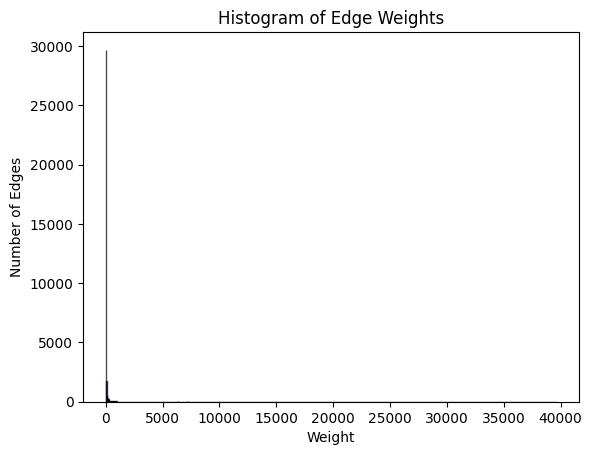

In [52]:
#extract edge weights
hist_data_edge_weights = [SEM_Graph[u][v]['weight'] for u, v in SEM_Graph.edges()]

#determine bin edges based on desired bin width
bin_width = 50
min_edge_weight = min(hist_data_edge_weights)
max_edge_weight = max(hist_data_edge_weights)
bins = np.arange(min_edge_weight, max_edge_weight + bin_width, bin_width)

#plot histogram
plt.hist(hist_data_edge_weights, bins=bins, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Edge Weights')
plt.xlabel('Weight')
plt.ylabel('Number of Edges')
plt.show()

In [55]:
SEM_Graph_clean = focus_edges(G = SEM_Graph, weight_min = 10)

In [56]:
#display a summary of the graph object created
graph_summary_stats(G = SEM_Graph_clean)

----------------------------------------
##### Graph Summary #####
number of nodes: 300
number of edges: 15411

nodes: ['nike', "women's", 'air', 'white', 'available', 'footlocker', 'sneakerscouts', 'adidas', 'lasership', 'work', 'next', 'ad', 'space', 'low', 'snipes_usa', 'snkrs', 'get', 'nikebasketball', 'partnership', 'team', 'release', 'jordan', 'real', 'support', 'friend', 'family', 'kaya_alexander5', 'nikestore', 'sneakeradmirals', 'pair', 'lot', 'wait', 'game', 'jumpman23', 'cnn', 'instagram', 'ebay', 'amazon', 'business', 'max', 'ht', 'dunk', 'adidasoriginals', 'look', 'wearing', 'say', 'drop', 'time', 'vapormax', 'flyknit', 'finishline', 'much', 'people', 'nicekicks', 'snkr_twitr', 'good', 'sport', 'week', 'take', 'black', 'lol', 'think', 'care', 'deal', 'run', 'company', 'win', 'guy', 'see', 'way', 'keep', 'play', 'top', 'going', 'year', 'thank', 'great', 'getting', 'show', 'making', 'want', 'kingjames', 'start', 'blazer', 'red', 'need', 'jersey', 'sneaker', 'day', 'date', 'f

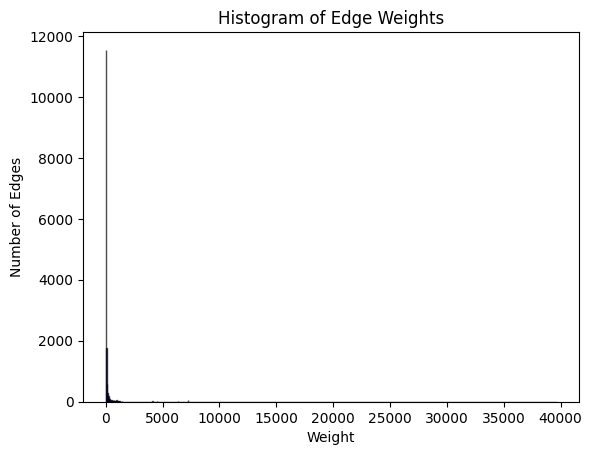

In [57]:
#extract edge weights
hist_data_edge_weights = [SEM_Graph_clean[u][v]['weight'] for u, v in SEM_Graph_clean.edges()]

#plot histogram
plt.hist(hist_data_edge_weights, bins=bins, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Edge Weights')
plt.xlabel('Weight')
plt.ylabel('Number of Edges')
plt.show()

## Create Subgraphs for Analysis

In [58]:
##### Shared Sets of Node Intersetions #####

# Define key nodes
key_nodes_all = ['nike', 'lululemon', 'adidas']
key_nodes_nl = ['nike', 'lululemon']
key_nodes_na = ['nike', 'adidas']
key_nodes_al = ['adidas', 'lululemon']

# Find neighbors of the key nodes by themselves
neighbors_sets_n = set(nx.all_neighbors(SEM_Graph_clean, 'nike'))
neighbors_sets_a = set(nx.all_neighbors(SEM_Graph_clean, 'adidas'))
neighbors_sets_l = set(nx.all_neighbors(SEM_Graph_clean, 'lululemon'))

# Find neighbors of the key nodes
neighbors_sets_all = [set(nx.all_neighbors(SEM_Graph_clean, node)) for node in key_nodes_all]
neighbors_sets_nl = [set(nx.all_neighbors(SEM_Graph_clean, node)) for node in key_nodes_nl]
neighbors_sets_na = [set(nx.all_neighbors(SEM_Graph_clean, node)) for node in key_nodes_na]
neighbors_sets_al = [set(nx.all_neighbors(SEM_Graph_clean, node)) for node in key_nodes_al]

# Intersect the sets to get nodes connected to all key nodes
common_neighbors_all = set.intersection(*neighbors_sets_all)

# Intersect the sets to get nodes connected to only 2 key nodes

common_neighbors_nl = set.intersection(*neighbors_sets_nl) - common_neighbors_all - set(key_nodes_al)
common_neighbors_na = set.intersection(*neighbors_sets_na) - common_neighbors_all - set(key_nodes_nl)
common_neighbors_al = set.intersection(*neighbors_sets_al) - common_neighbors_all - set(key_nodes_na)

# Get nodes connected to any one of the key nodes but not all of them
union_neighbors = set.union(*neighbors_sets_all)

# Get nodes connected to only 1 brand
exclusive_neighbors = (union_neighbors - common_neighbors_all
                       - common_neighbors_nl - common_neighbors_na - common_neighbors_al)

# Get nodes connected to each specific brand
exclusive_neighbors_n = neighbors_sets_n - common_neighbors_all - common_neighbors_nl - common_neighbors_na - set(key_nodes_al)
exclusive_neighbors_a = neighbors_sets_a - common_neighbors_all - common_neighbors_na - common_neighbors_nl - set(key_nodes_nl)
exclusive_neighbors_l = neighbors_sets_l - common_neighbors_all - common_neighbors_nl - common_neighbors_al - set(key_nodes_na)

In [59]:
##### Bridging to All Brands Nodes #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_all) + key_nodes_all
SEM_Graph_bridge_3 = focus_edges(G=SEM_Graph_clean, weight_min=125).subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = SEM_Graph_bridge_3, title='Bridging to All Brands Nodes')

##### Nike to Adidas Bridges #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_na) + key_nodes_na
SEM_Graph_bridge_na = SEM_Graph_clean.subgraph(nodes_to_keep)
#SEM_Graph_bridge_na = focus_edges(G = SEM_Graph_bridge_na, weight_min = 1000)
#display a summary of the subgraph
graph_summary_stats(G = SEM_Graph_bridge_na, title='Nike to Adidas Bridges')

##### Nike to Lululemon Bridges #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_nl) + key_nodes_nl
SEM_Graph_bridge_nl = SEM_Graph_clean.subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = SEM_Graph_bridge_nl, title='Nike to Lululemon Bridges')

##### Adidas to Lululemon Bridges #####
# Create a subgraph
nodes_to_keep = list(common_neighbors_al) + key_nodes_al
SEM_Graph_bridge_al = SEM_Graph_clean.subgraph(nodes_to_keep)
#display a summary of the subgraph
graph_summary_stats(G = SEM_Graph_bridge_al, title='Adidas to Lululemon Bridges')

----------------------------------------
##### Bridging to All Brands Nodes #####
number of nodes: 190
number of edges: 781

nodes: ['nike', 'white', 'available', 'adidas', 'work', 'next', 'ad', 'space', 'low', 'get', 'partnership', 'team', 'real', 'support', 'friend', 'family', 'pair', 'lot', 'wait', 'game', 'jumpman23', 'amazon', 'business', 'look', 'wearing', 'say', 'drop', 'time', 'much', 'people', 'good', 'sport', 'week', 'take', 'black', 'lol', 'think', 'care', 'deal', 'run', 'company', 'win', 'guy', 'see', 'way', 'keep', 'top', 'going', 'year', 'thank', 'great', 'getting', 'show', 'making', 'want', 'start', 'red', 'need', 'day', 'fashion', 'know', 'thanks', 'something', 'trying', 'issue', 'let', 'make', 'sure', 'love', 'buy', 'everyone', 'go', 'shoe', 'part', 'hey', 'cool', 'got', 'brand', 'new', 'customer', 'bought', 'month', 'turn', 'please', 'use', 'package', 'put', 'lululemon', 'happy', "we're", 'giving', 'store', 'running', 'thing', "i'm", 'woman', 'service', 'night', 'gonn

In [60]:
##### Exclusive Nodes: Unique to Only 1 Brand #####

# Create a subgraph
nodes_to_keep_exc = list(exclusive_neighbors) + key_nodes_all
SEM_Graph_exc = SEM_Graph_clean.subgraph(nodes_to_keep_exc)

#display a summary of the subgraph
graph_summary_stats(G = SEM_Graph_exc, title='Exclusive Nodes: Unique to Only 1 Brand')

# Create a subgraph
SEM_Graph_exc_n = SEM_Graph_clean.subgraph(list(exclusive_neighbors_n) + ['nike'])
SEM_Graph_exc_a = SEM_Graph_clean.subgraph(list(exclusive_neighbors_a) + ['adidas'])
SEM_Graph_exc_l = SEM_Graph_clean.subgraph(list(exclusive_neighbors_l) + ['lululemon'])

#filter the graph edges to focus on influential to brands
#SEM_Graph_exc_n = focus_edges(G = SEM_Graph_exc_n, weight_min = 125)
#SEM_Graph_exc_a = focus_edges(G = SEM_Graph_exc_a, weight_min = 125)

#display a summary of the subgraph
graph_summary_stats(G = SEM_Graph_exc_n, title='Exclusive Nodes for Nike')
graph_summary_stats(G = SEM_Graph_exc_a, title='Exclusive Nodes for Adidas')
graph_summary_stats(G = SEM_Graph_exc_l, title='Exclusive Nodes for Lululemon')

----------------------------------------
##### Exclusive Nodes: Unique to Only 1 Brand #####
number of nodes: 43
number of edges: 113

nodes: ['se', 'ene', 'yardrunner', 'nikenyc', 'cnn', 'adidasfballus', 'max', 'lebron', 'purple', 'centre', "abloh's", 'heartbroken', 'modern', 'kanter', 'xboxsweepstakes', 'adidas', 'hyperkin', 'nba_newyork', 'flyknit', 'blazer', 'donovan', 'phil', 'impossibleisnothing', 'celtic', 'virgil', 'austinekeler', 'maybes', 'scctradingcards', 'ronwyden', 'brilliant', 'forced', 'nike', 'knight', 'thee', 'vapormax', 'slavery', 'mitchell', 'graduation', 'theestallion', 'enduyghurforcedlabor', 'lululemon', 'sneakerscouts', 'snipes_usa']

neighbors of adidas: ['nike', 'adidasfballus', 'impossibleisnothing', 'donovan', 'mitchell', 'austinekeler', 'xboxsweepstakes', 'hyperkin', 'maybes']
neighbors of nike: ['sneakerscouts', 'adidas', 'cnn', 'max', 'snipes_usa', 'vapormax', 'flyknit', 'blazer', 'se', 'nikenyc', 'forced', 'phil', 'knight', 'lebron', 'purple', 'theestall

## Plot All the Graphs

In [61]:
#plot the baseline graph
plot_graph(G = SEM_Graph_clean, file_path='04_01_semantic_network', use_edge_weight=False, plot_size='large')

In [62]:
#plot the graph
plot_graph(G = SEM_Graph_bridge_3, file_path='05_01_semantic_network_bridge_all_3', use_edge_weight=False, plot_size='medium')

#plot the graph
plot_graph(G = SEM_Graph_bridge_na, file_path='05_02_semantic_network_bridge_nike_adidas', use_edge_weight=False, plot_size='small')

#plot the graph
plot_graph(G = SEM_Graph_bridge_nl, file_path='05_03_semantic_network_bridge_nike_lululemon', use_edge_weight=False, plot_size='small')

#plot the graph
plot_graph(G = SEM_Graph_bridge_al, file_path='05_04_semantic_network_bridge_adidas_lululemon', use_edge_weight=False, plot_size='small')

In [63]:
#plot the exclusive node graph
plot_graph(G = SEM_Graph_exc, file_path='06_01_semantic_network_exclusive', use_edge_weight=False, plot_size='small')

#plot the graph
plot_graph(G = SEM_Graph_exc_n, file_path='06_02_semantic_network_exclusive_to_nike', use_edge_weight=False, plot_size='small')

#plot the graph
plot_graph(G = SEM_Graph_exc_a, file_path='06_03_semantic_network_exclusive_to_adidas', use_edge_weight=False, plot_size='small')

#plot the graph
plot_graph(G = SEM_Graph_exc_l, file_path='06_04_semantic_network_exclusive_to_lulu', use_edge_weight=False, plot_size='small')

## Graph with Pyvis

In [65]:
#https://pyvis.readthedocs.io/en/latest/tutorial.html
# create a network model in pyviz
nt = Network(height="600px", width="100%", directed=True, notebook=True, layout='force_atlas_2based', cdn_resources='remote')
# populates the nodes and edges data structures
nt.from_nx(MEN_Graph)
nt.show_buttons(filter_=['physics'])
nt.show('nx.html')
from IPython.core.display import display, HTML
display(HTML('nx.html'))

nx.html
